###### 项目：分析鸢尾花种类数据

### 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

### 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

### 读取数据

导入数据分析所需要的库，用Pandas的`read_csv`函数，将'Iris.csv'原始数据集，解析为DataFrame格式，并赋值给变量`df`

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


### 评估和清理数据

在这一部分，我将对上一部分所建立的`df`数据集所包含的数据进行评估和清理。

评估主要从两个方面进行：结构和内容，即整齐度和干净度。数据的结构性问题指不符合“每列是一个变量，每行是一个观察值，每个单元格是一个值”这三个标准，数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

为了区分经过清理的数据和原始的数据，我们创建新的变量`cleaned_df`，让它成为`df`复制出的副本。之后的清理步骤都将被运用在`cleaned_df`上。

In [3]:
cleaned_df = df.copy()

#### 数据整齐度

利用DataFrame的`sample`方法，提供`df`的实际数据，来评估数据的整齐度

In [4]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
46,47,5.1,3.8,1.6,0.2,Iris-setosa
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
28,29,5.2,3.4,1.4,0.2,Iris-setosa
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


从抽样的10行数据来看，符合'每列是一个变量，每行是一个观察值，每个单元格是一个值'这三个标准，具体来看每行是一株鸢尾花的样本信息，每列是关于鸢尾花的各个变量，因此不存在结构性问题。

#### 数据干净度

利用DataFrame的`info`方法，对`df`数据集的内容进行大致了解。

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


从输出结果来看，`df`数据集共有100条观察值

所有列均不存在缺失值。

数据类型方面，`Id`列数据类型应为str；此外我们已知`Species`是分类数据，因此可以转换为Category数据类型

将`Id`列数据类型转换为str,将`Species`列数据类型转换为Category：

In [7]:
cleaned_df.Id = cleaned_df.Id.astype(str)
cleaned_df.Species = cleaned_df.Species.astype('category')
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             100 non-null    object  
 1   SepalLengthCm  100 non-null    float64 
 2   SepalWidthCm   100 non-null    float64 
 3   PetalLengthCm  100 non-null    float64 
 4   PetalWidthCm   100 non-null    float64 
 5   Species        100 non-null    category
dtypes: category(1), float64(4), object(1)
memory usage: 4.2+ KB


#### 处理缺失数据

从`info`方法输出的结果来看，`cleaned_df`不存在缺失值，因此不需要对缺失数据进行处理

#### 处理重复数据

根据数据变量的含义和内容来看，`cleaned_df`中的`Id`列不应该出现重复观察值，查看是否存在重复值：

In [8]:
cleaned_df[cleaned_df.Id.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


从结果来看，不存在重复数据

#### 处理不一致数据

针对`cleaned_df`，不一致数据可能存在于`Species`变量中，我将查看是否存在不同值指代统一鸢尾花种类的情况

In [10]:
cleaned_df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

从结果来看，`Species`变量总不存在不一致数据。

#### 处理无效/错误数据

通过DataFrame的`describe`方法，对数值统计信息进行快速了解：

In [11]:
cleaned_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


从以上统计信息来看，`cleaned_df`中不存在脱离现实意义的数值

#### 保存清理后的数据

`cleaned_df`数据集保存为`Iris_cleaned.csv`

In [12]:
cleaned_df.to_csv('Iris_cleaned.csv', index=False)
pd.read_csv('Iris_cleaned.csv')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


### 整理数据

整理数据，与数据分析目的密切相关。此次数据分析的目的是：基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异。

那么我们可以根据`Species`列，筛选不同鸢尾花种类的样本数据：

In [15]:
setosa = cleaned_df.query('Species == "Iris-setosa"')
setosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
len(setosa)

50

In [17]:
versicolor = cleaned_df.query('Species == "Iris-versicolor"')
versicolor.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [19]:
len(versicolor)

50

### 探索数据

在着手推断统计学分析之前，我们可以先借助数据可视化，探索`setosa`和`versicolor`这两种鸢尾花的变量特点。

可视化探索可以帮我们对数据有一个更直观的理解，比如了解数据的分布、发现变量之间的关系等等，从而为后续的进一步分析提供方向。

针对数值数据，我们可以直接绘制承兑图，利用其中的密度图查看不同变量的分布，以及利用散点图了解变量之间的关系。

由于此次分析目的是了解不同种类鸢尾花的属性特征是否存在差异，我们可以利用颜色对图表上不同种类的样本进行分类。

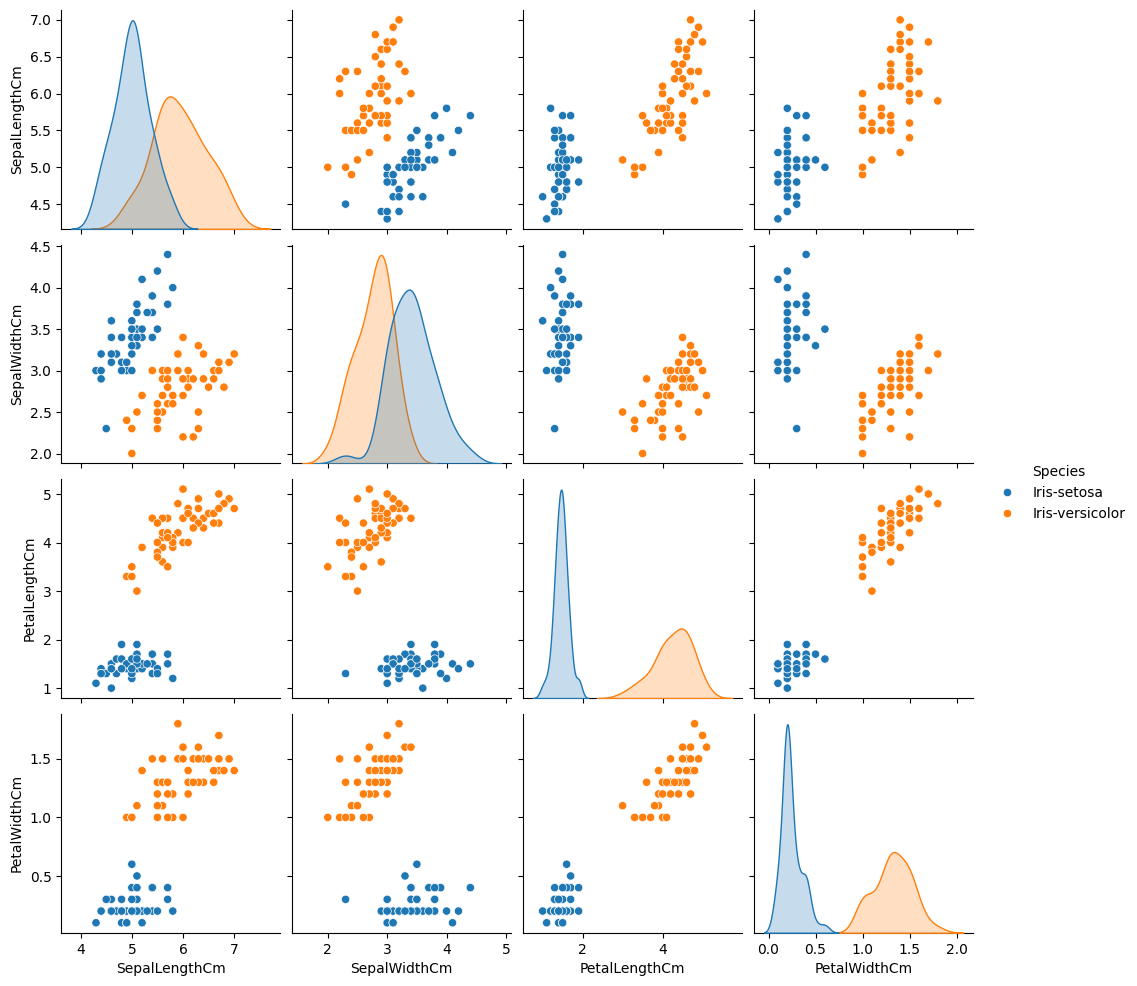

In [20]:
sns.pairplot(cleaned_df, hue='Species')
plt.show()

从图中可以看出，`setosa`和`versicolor`样本的画板长度以及花瓣宽度的分布存在明显数值上的不同，已经可以预测假设检验的结果是，两种鸢尾花的画板长度和宽度有显著性差异。

萼片的长度和宽度在分布上存在重叠，暂时无法仅通过图表下结论，需要进行假设检验，来推断总体萼片长度和宽度之间是否有差异。

### 分析数据

我们将利用假设检验，一次检验`Setosa`和`Versicolor`这两种鸢尾花在萼片、花瓣长度和宽度平均值方面，是否存在统计显著性差异

由于我们只有样本数据，不知道总体的标准差，加上两组样本各为50，样本数量不大，没有显著大于30，因此进行t检验，而不是z检验。假设次数据集样本符合t检验的两个前提：样本为随机抽样，总体呈正态分布。

先引入t检验所需要的模块：

In [21]:
from scipy.stats import ttest_ind

#### 分析萼片长度

Setosa和Versicolor萼片长度的分布如下：

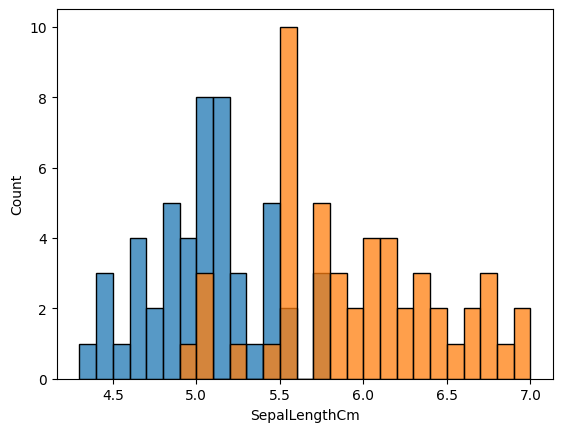

In [23]:
sns.histplot(setosa.SepalLengthCm, binwidth=0.1)
sns.histplot(versicolor.SepalLengthCm, binwidth=0.1)
plt.show()

##### 建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值不存在显著差异。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著差异。

##### 确认检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更长，所以是双尾检验。

##### 确定显著水平

In [25]:
alpha = 0.05

##### 计算t值和p值

In [27]:
t_stat, p_value = ttest_ind(setosa.SepalLengthCm, versicolor.SepalLengthCm)
print(f"t值：{t_stat}\np值：{p_value}")

t值：-10.52098626754911
p值：8.985235037487079e-18


##### 结论

由于p值小于显著水平0.05,因此我们拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著差异

#### 分析萼片宽度

Setosa和Versicolor的萼片宽度的分布如下：

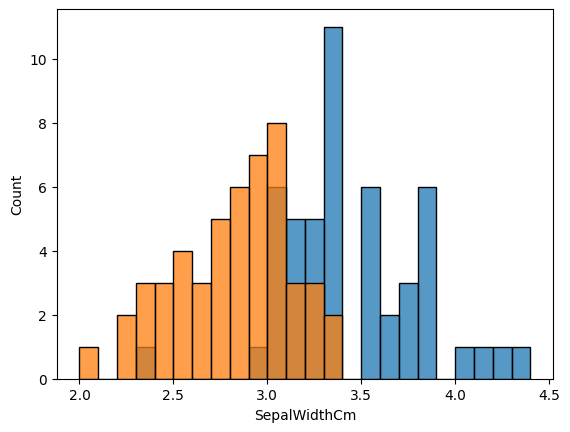

In [31]:
sns.histplot(setosa.SepalWidthCm, binwidth=0.1)
sns.histplot(versicolor.SepalWidthCm, binwidth=0.1)
plt.show()

##### 建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值不存在显著差异。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值存在显著差异。

##### 确认检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更宽，所以是双尾检验。

##### 确定显著水平

In [30]:
alpha = 0.05

##### 计算t值和p值

In [32]:
t_stat, p_value = ttest_ind(setosa.SepalWidthCm, versicolor.SepalWidthCm)
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：9.282772555558111
p值：4.362239016010214e-15


##### 结论

由于p值小于显著水平0.05，因此我们拒绝原假设，说明Setosa和Versicolor萼片宽度的平均值存在显著差异

#### 分析花瓣长度

Setosa和Versicolor的花瓣长度的分布如下：

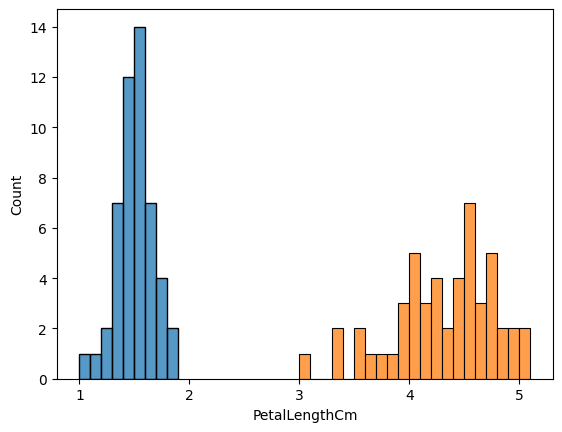

In [33]:
sns.histplot(setosa.PetalLengthCm, binwidth=0.1)
sns.histplot(versicolor.PetalLengthCm, binwidth=0.1)
plt.show()

##### 建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值不存在显著差异。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值存在显著差异。

##### 确认检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的花瓣更长，所以是双尾检验。

##### 确认显著水平

In [34]:
alpha = 0.05

##### 计算t值和p值

In [35]:
t_stat, p_value = ttest_ind(setosa.PetalLengthCm, versicolor.PetalLengthCm)
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-39.46866259397272
p值：5.717463758170621e-62


##### 结论

由于p值小于显著水平0.05，因此我们拒绝原假设，说明Setosa和Versicolor花瓣长度的平均值存在显著差异

#### 分析花瓣宽度

Setosa和Versicolor的花瓣宽度的分布如下：

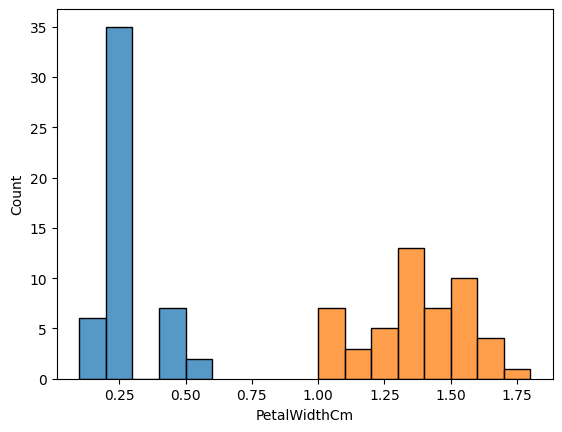

In [36]:
sns.histplot(setosa.PetalWidthCm, binwidth=0.1)
sns.histplot(versicolor.PetalWidthCm, binwidth=0.1)
plt.show()

##### 建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花花瓣宽度的平均值不存在显著差异。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花花瓣宽度的平均值存在显著差异。

##### 确认检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的花瓣更长，所以是双尾检验。

##### 确认显著水平

In [37]:
alpha = 0.05

##### 计算t值和p值

In [38]:
t_stat, p_value = ttest_ind(setosa.PetalWidthCm, versicolor.PetalWidthCm)
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-34.01237858829048
p值：4.589080615710866e-56


##### 结论

由于p值小于显著水平0.05，因此我们拒绝原假设，说明Setosa和Versicolor花瓣宽度的平均值存在显著差异

### 结论

通过推断统计学的计算，我们发现，Setosa鸢尾花和Versicolor鸢尾花在萼片、花瓣的长度和宽度平均值，均存在具有统计显著性的差异。